In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('jobs.csv')

In [ ]:
df.head(10)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
5,2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Senior,Full-time,Remote,United States,M
6,2023,Data Scientist,Data Science and Research,USD,100000,100000,United States,Senior,Full-time,Remote,United States,M
7,2023,Machine Learning Researcher,Machine Learning and AI,USD,224400,224400,United States,Mid-level,Full-time,In-person,United States,M
8,2023,Machine Learning Researcher,Machine Learning and AI,USD,138700,138700,United States,Mid-level,Full-time,In-person,United States,M
9,2023,Data Engineer,Data Engineering,USD,210000,210000,United States,Executive,Full-time,Remote,United States,M


In [ ]:
df.isnull().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,0
employment_type,0
work_setting,0


In [ ]:
df.shape

(9355, 12)

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

# original dataframe
n_original = len(df)

# create extra realistic rows
n_new = int(0.5 * n_original)
new_rows = df.sample(n=n_new, replace=True).reset_index(drop=True)

all_cols = list(new_rows.columns)

# -------- choose columns for each category --------

# 1–2 columns with >30% missing
high_missing_cols = np.random.choice(all_cols, size=np.random.randint(1,3), replace=False)
remaining = list(set(all_cols) - set(high_missing_cols))

# 2–3 columns with >15% missing
mid_missing_cols = np.random.choice(remaining, size=np.random.randint(2,4), replace=False)
remaining = list(set(remaining) - set(mid_missing_cols))

# exactly 4 columns with >0% and <5% missing
low_missing_cols = np.random.choice(remaining, size=4, replace=False)

# -------- function to insert missing values --------
def make_missing(col, frac):
    n = len(new_rows)
    k = max(1, int(n * frac))
    idx = np.random.choice(n, k, replace=False)
    new_rows.loc[idx, col] = np.nan

# -------- apply missingness --------

# >30%
for col in high_missing_cols:
    frac = np.random.uniform(0.31, 0.45)
    make_missing(col, frac)

# >15%
for col in mid_missing_cols:
    frac = np.random.uniform(0.16, 0.30)
    make_missing(col, frac)

# >0% and <5%  (exactly 4 columns here)
for col in low_missing_cols:
    frac = np.random.uniform(0.01, 0.04)
    make_missing(col, frac)

# -------- combine with original (original unchanged) --------
df_extended = pd.concat([df, new_rows], ignore_index=True)

# -------- reporting --------
print("High missing (>30%) columns:", high_missing_cols)
print("Medium missing (>15%) columns:", mid_missing_cols)
print("Low missing (>0% and <5%) columns:", low_missing_cols)

print("\nMissing % in new rows only:")
print(new_rows.isna().mean() * 100)

print("\nOriginal shape:", df.shape)
print("Extended shape:", df_extended.shape)


High missing (>30%) columns: ['salary_in_usd']
Medium missing (>15%) columns: ['experience_level' 'employment_type' 'work_year']
Low missing (>0% and <5%) columns: ['company_size' 'salary' 'job_title' 'work_setting']

Missing % in new rows only:
work_year             23.284157
job_title              2.715416
job_category           0.000000
salary_currency        0.000000
salary                 3.014753
salary_in_usd         38.635878
employee_residence     0.000000
experience_level      28.415651
employment_type       28.073551
work_setting           2.800941
company_location       0.000000
company_size           3.164422
dtype: float64

Original shape: (9355, 12)
Extended shape: (14032, 12)


In [ ]:
df_extended.shape

(14032, 12)

In [ ]:
df = df_extended.copy()

In [ ]:
df.isnull().sum()

,0
work_year,1089
job_title,127
job_category,0
salary_currency,0
salary,141
salary_in_usd,1807
employee_residence,0
experience_level,1329
employment_type,1313
work_setting,131


In [ ]:
df.shape

(14032, 12)

In [ ]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['job_title', 'salary', 'work_setting', 'company_size']

In [ ]:
df[cols].sample(6
                )

,job_title,salary,work_setting,company_size
6780,Analytics Engineer,197000.0,In-person,M
486,Applied Scientist,136000.0,In-person,L
5489,Data Analytics Manager,155000.0,In-person,M
4760,Data Science Engineer,266450.0,In-person,M
13287,Machine Learning Scientist,120000.0,Hybrid,S
12223,Research Scientist,303050.0,In-person,M


In [ ]:
len(df[cols].dropna()) / len(df)

0.9623717217787914

In [ ]:
new_df = df[cols].dropna()
new_df.head()

,job_title,salary,work_setting,company_size
0,Data DevOps Engineer,88000.0,Hybrid,L
1,Data Architect,186000.0,In-person,M
2,Data Architect,81800.0,In-person,M
3,Data Scientist,212000.0,In-person,M
4,Data Scientist,93300.0,In-person,M


In [ ]:
new_df.shape

(13504, 4)

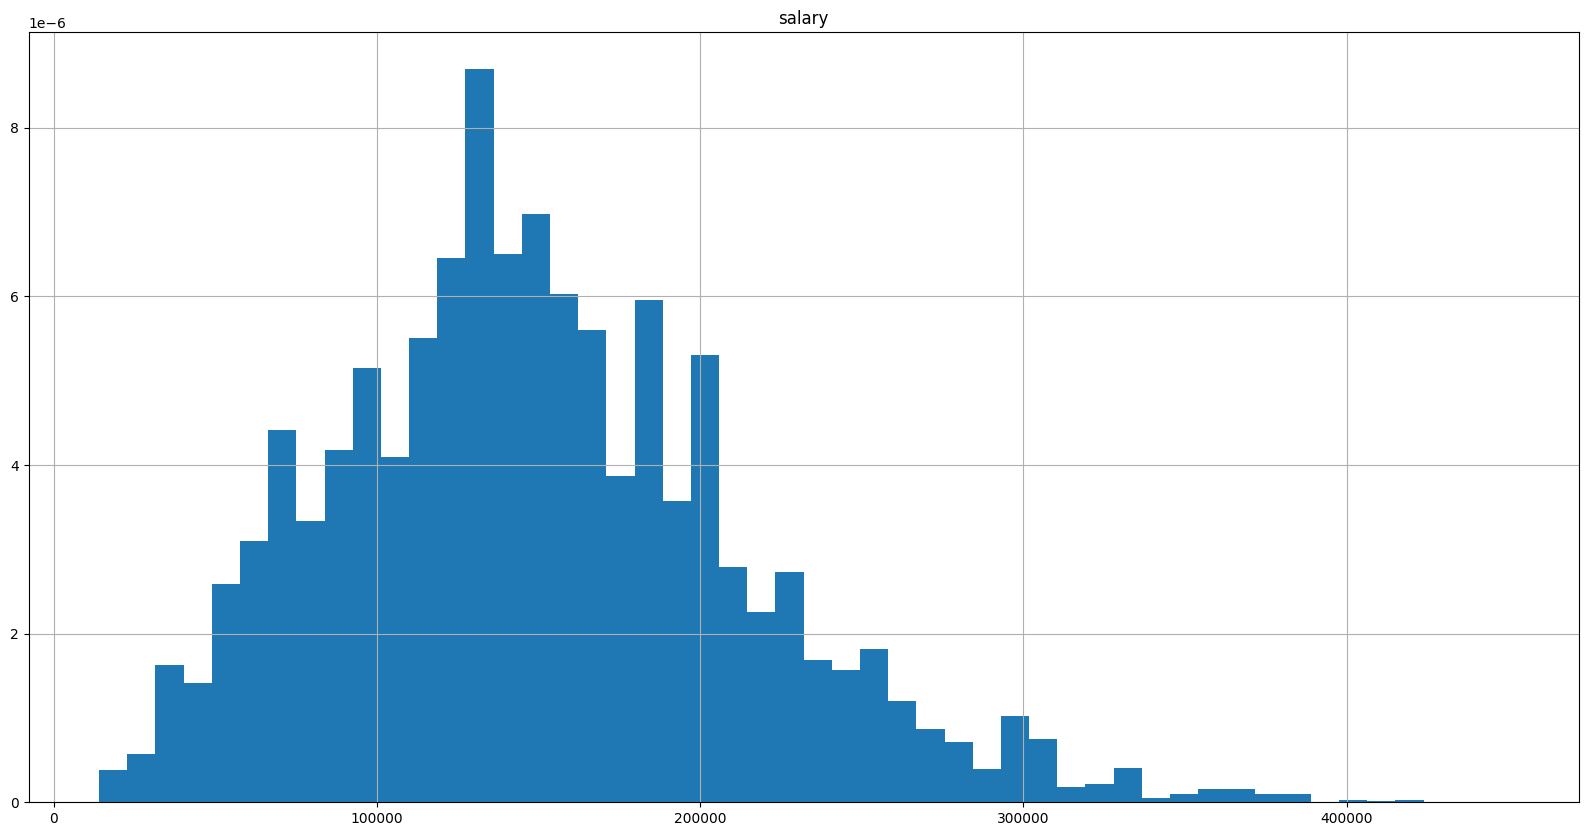

In [ ]:
new_df.hist(bins= 50, figsize= (20, 10), density= True)

plt.show()

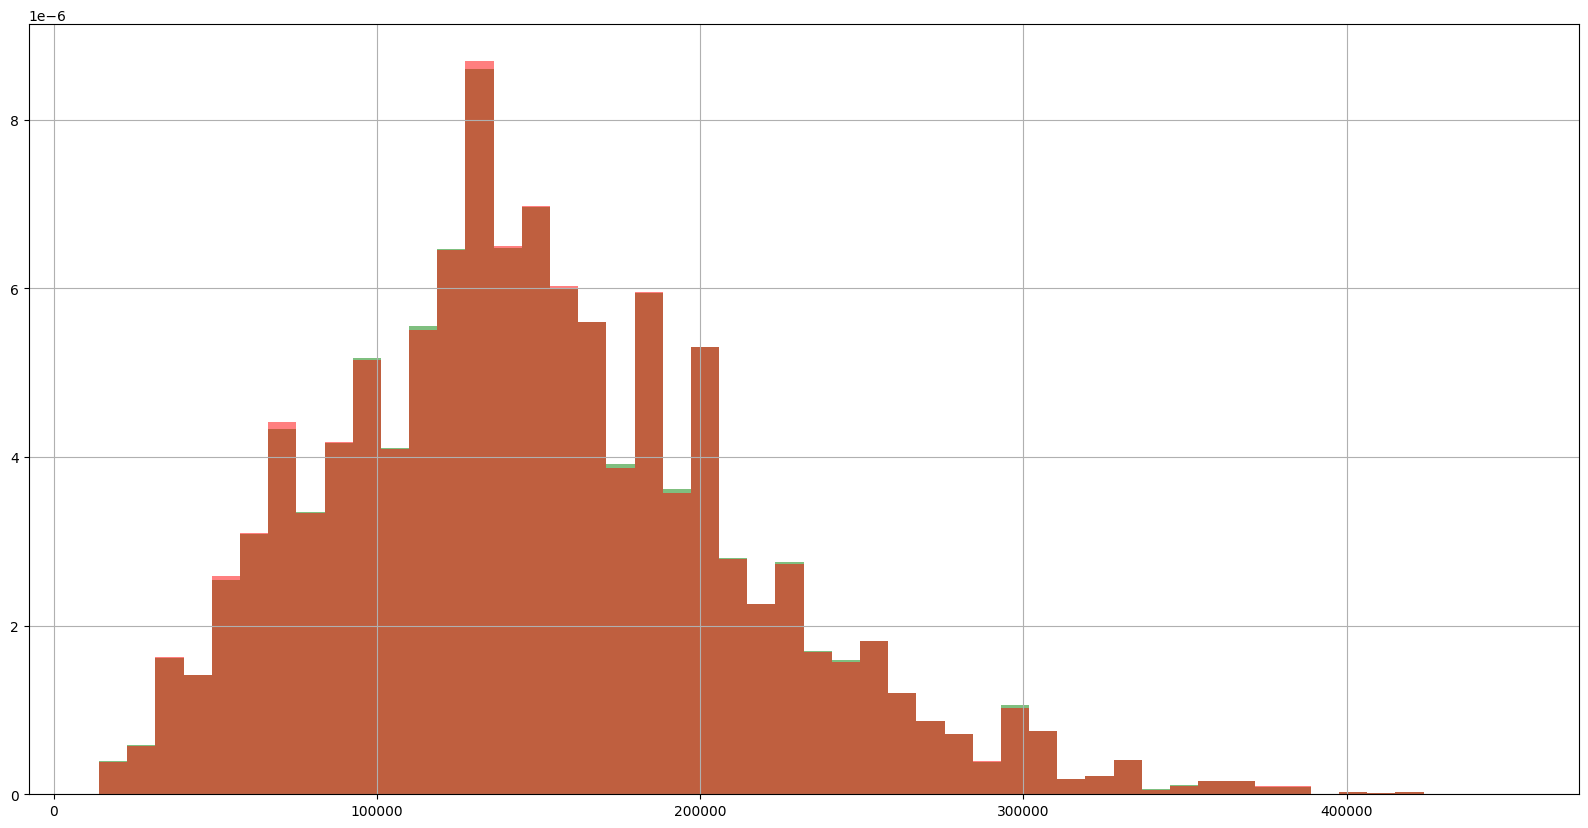

In [ ]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)

# original data
df['salary'].hist(bins= 50, density= True, alpha= 0.5, ax= ax, color= 'green')

# new data
new_df['salary'].hist(bins= 50, density= True, alpha= 0.5, ax= ax, color= 'red')

plt.show()

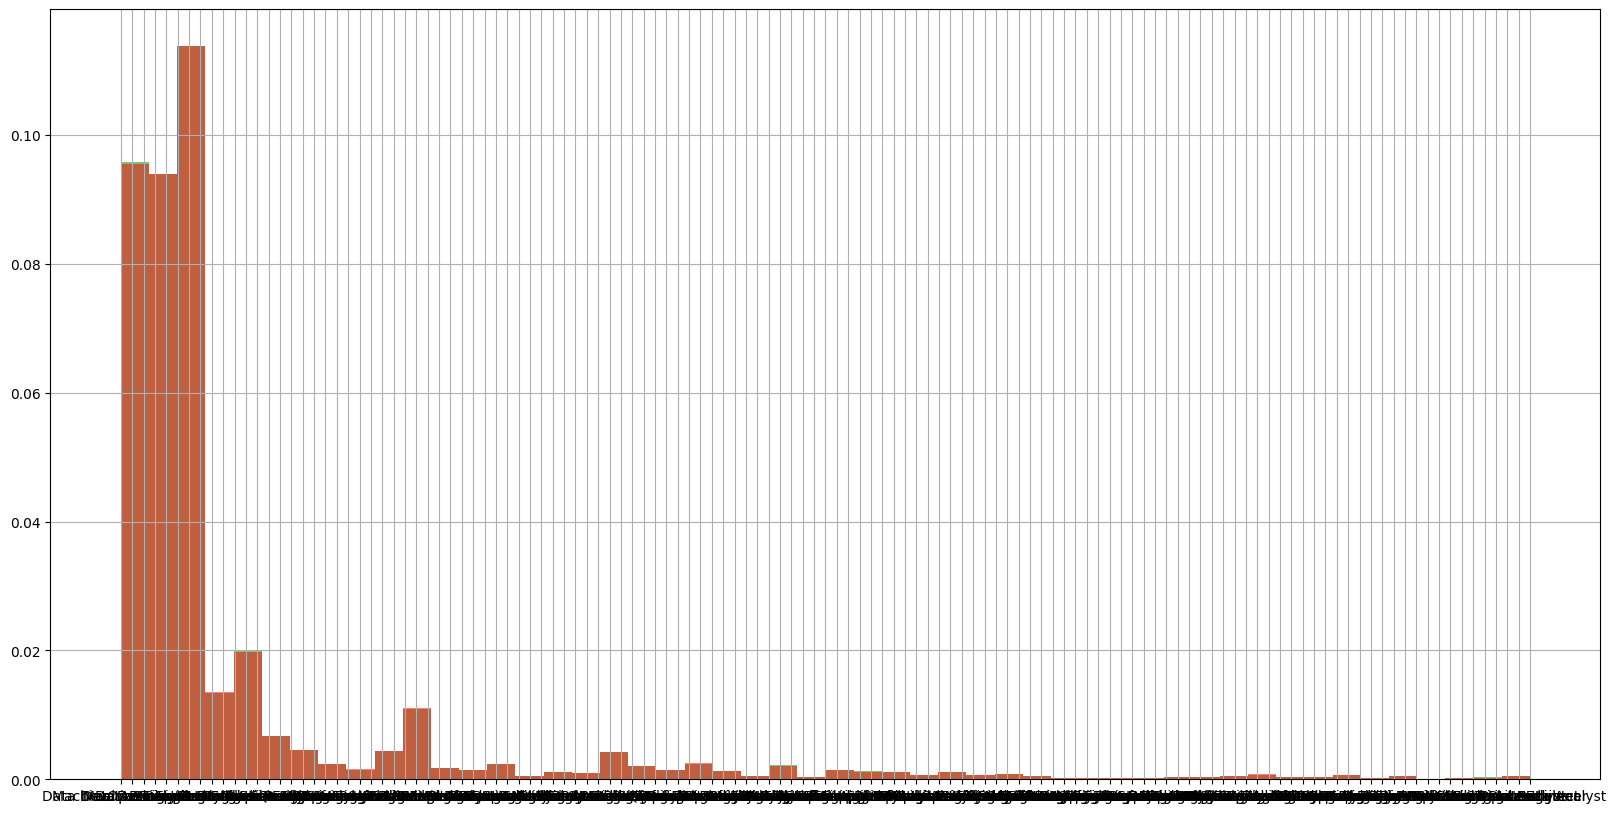

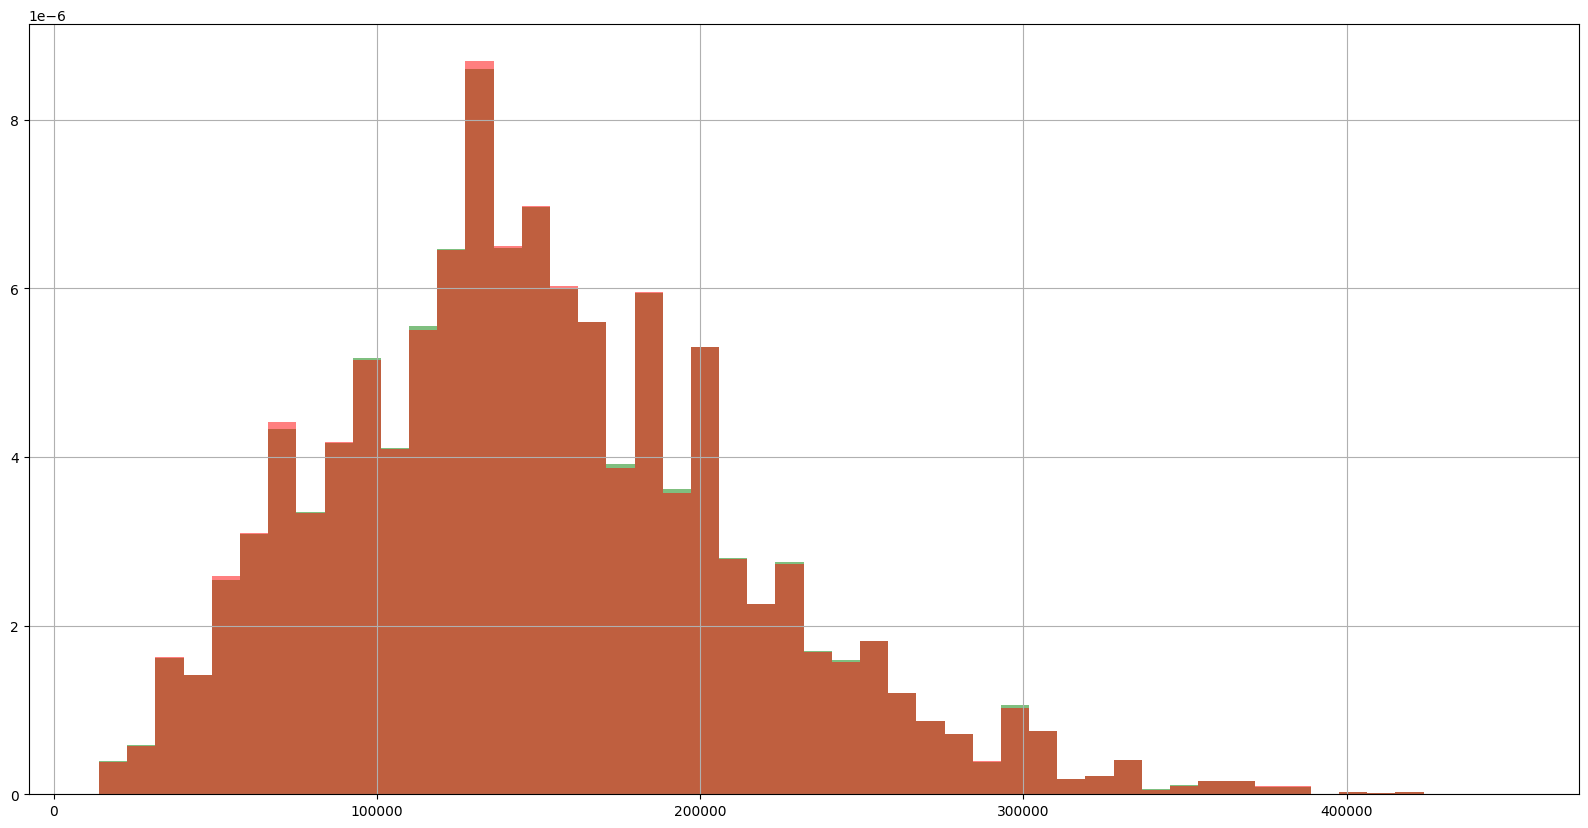

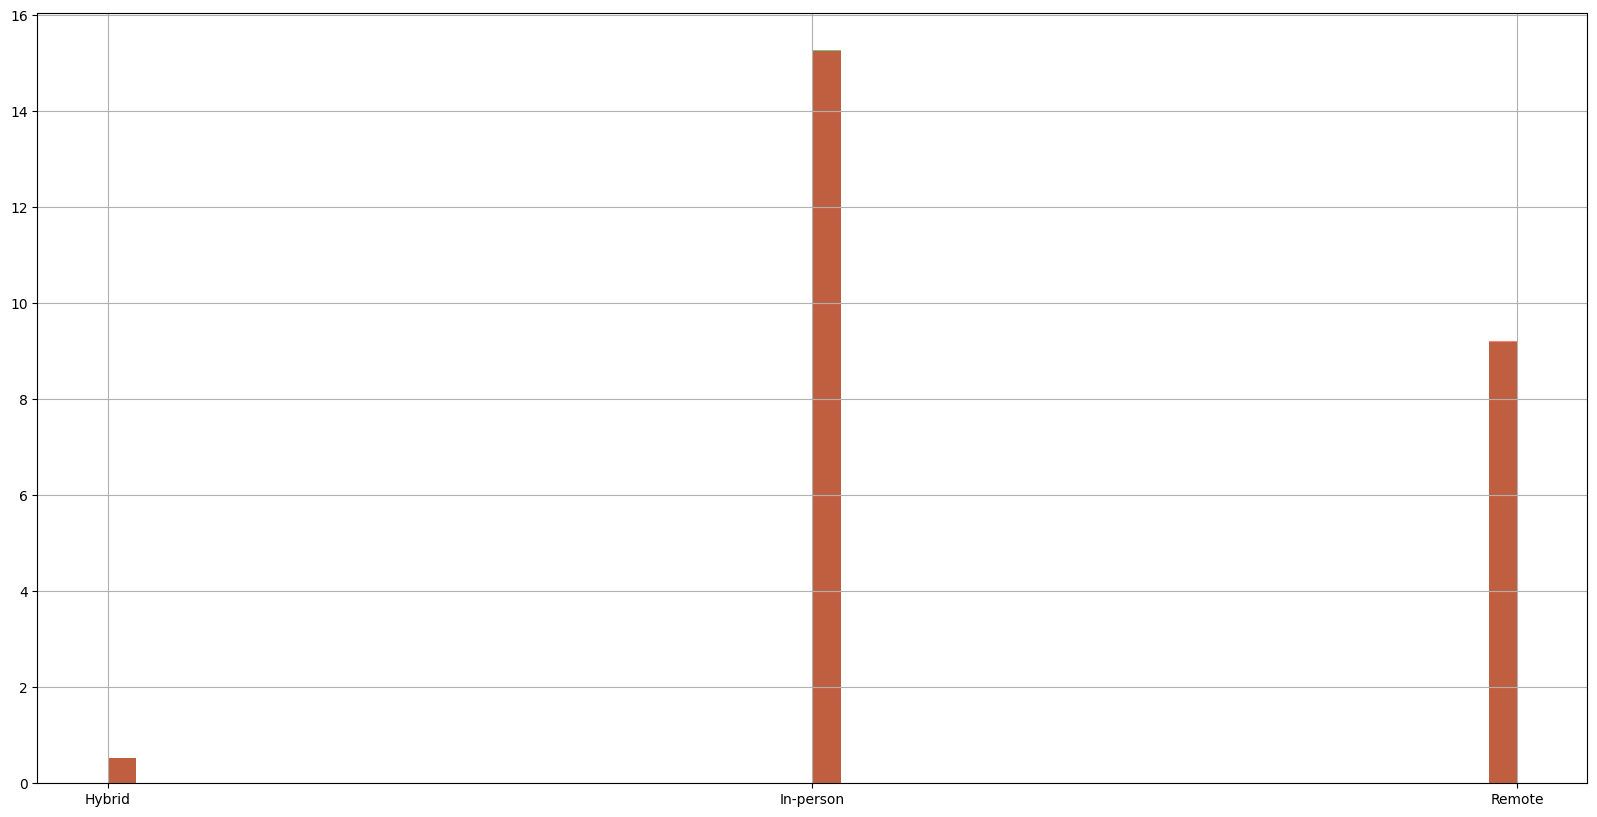

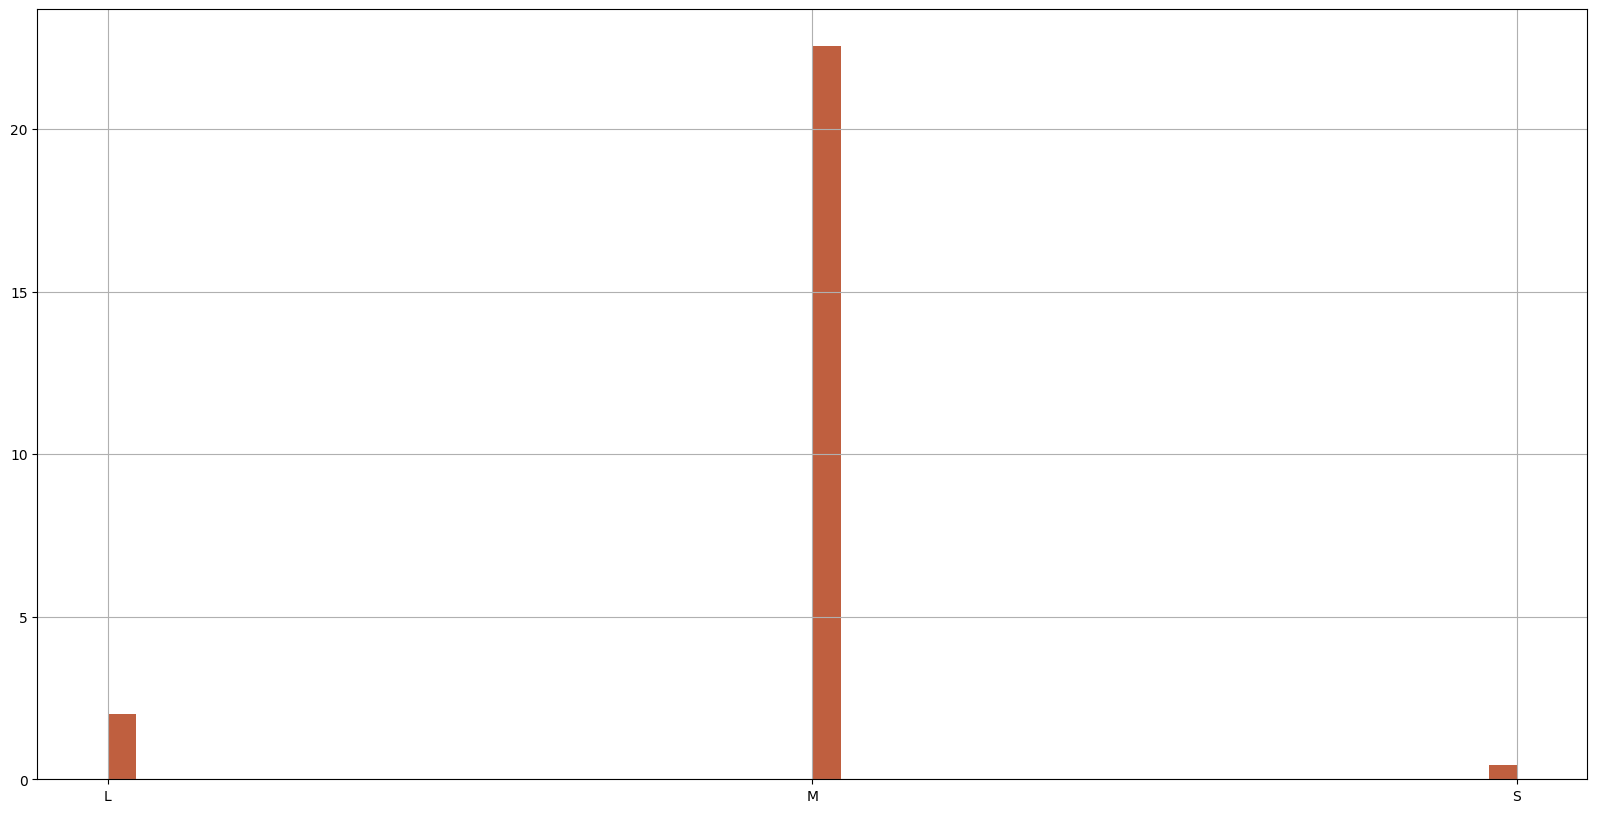

In [ ]:
for col in cols:
  fig = plt.figure(figsize= (20, 10))
  ax = fig.add_subplot(111)

  # original data
  df[col].hist(bins= 50, density= True, alpha= 0.5, ax= ax, color= 'green')

  # new data
  new_df[col].hist(bins= 50, density= True, alpha= 0.5, ax= ax, color= 'red')

  plt.show()

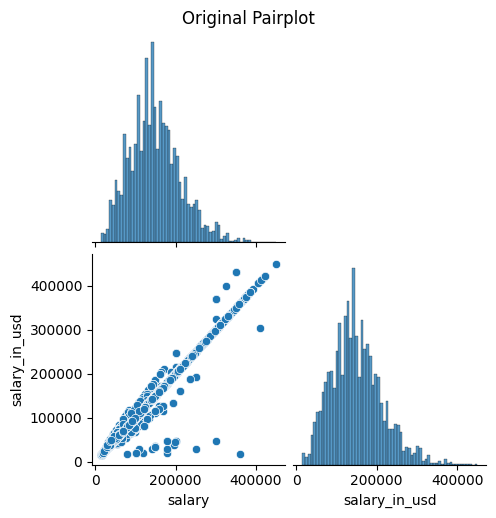

KeyError: "['salary_in_usd'] not in index"

In [ ]:
sns.pairplot(df[['salary','salary_in_usd']].dropna(), corner=True)
plt.suptitle('Original Pairplot', y=1.02)
plt.show()

sns.pairplot(new_df[['salary','salary_in_usd']], corner=True)
plt.suptitle('After CCA Pairplot', y=1.02)
plt.show()


In [55]:
category = ['job_title', 'work_setting', 'company_size']

In [50]:
df['job_title'].value_counts()

,count
job_title,
Data Engineer,3214
Data Scientist,2972
Data Analyst,2078
Machine Learning Engineer,1476
Research Scientist,420
...,...
AWS Data Architect,1
Sales Data Analyst,1
Manager Data Management,1


In [51]:
df['work_setting'].value_counts()

,count
work_setting,
In-person,8493
Remote,5114
Hybrid,294


In [52]:
df['company_size'].value_counts()

,count
company_size,
M,12529
L,1110
S,245


In [53]:
temp = pd.concat([
    # percentage of observations per cat, original data
    df['job_title'].value_counts() / len(df),

    # percentage of observations per cat, new data
    new_df['job_title'].value_counts() / len(new_df)
], axis= 1)

#add column names
temp.columns = ['original', 'new']

temp

,original,new
job_title,,
Data Engineer,0.229048,0.231339
Data Scientist,0.211802,0.213566
Data Analyst,0.148090,0.149733
Machine Learning Engineer,0.105188,0.105746
Research Scientist,0.029932,0.030361
...,...,...
AWS Data Architect,0.000071,0.000074
Sales Data Analyst,0.000071,0.000074
Manager Data Management,0.000071,0.000074


In [57]:
for cat in category:
  temp = pd.concat([
    # percentage of observations per cat, original data
    df[cat].value_counts() / len(df),

    # percentage of observations per cat, new data
    new_df[cat].value_counts() / len(new_df)
    ], axis= 1)

  #add column names
  temp.columns = ['original', 'new']

  print(temp)

                           original       new
job_title                                    
Data Engineer              0.229048  0.231339
Data Scientist             0.211802  0.213566
Data Analyst               0.148090  0.149733
Machine Learning Engineer  0.105188  0.105746
Research Scientist         0.029932  0.030361
...                             ...       ...
AWS Data Architect         0.000071  0.000074
Sales Data Analyst         0.000071  0.000074
Manager Data Management    0.000071  0.000074
Deep Learning Researcher   0.000071  0.000074
Marketing Data Engineer    0.000071  0.000074

[125 rows x 2 columns]
              original       new
work_setting                    
In-person     0.605259  0.610338
Remote        0.364453  0.368780
Hybrid        0.020952  0.020883
              original       new
company_size                    
M             0.892888  0.901955
L             0.079105  0.080124
S             0.017460  0.017921
